Import pycaret

In [19]:
import pycaret
pycaret.__version__

'3.3.2'

Load wine dataset

In [20]:
import pandas as pd
  
df = pd.read_csv('winequality-red.csv', sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Setup

In [21]:
from pycaret.classification import *

s = setup(df, target='quality', session_id=123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


Compare Models

In [22]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.0350
xgboost,Extreme Gradient Boosting,0.6649,0.5696,0.6649,0.6465,0.6519,0.4627,0.4648,0.1010
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.0430
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,0.5980
catboost,CatBoost Classifier,0.6425,0.5719,0.6425,0.6191,0.6241,0.4232,0.4282,1.8160
gbc,Gradient Boosting Classifier,0.6354,0.0000,0.6354,0.6192,0.6237,0.4175,0.4197,0.1770
lr,Logistic Regression,0.6032,0.0000,0.6032,0.5748,0.5728,0.3399,0.3469,0.6550
lda,Linear Discriminant Analysis,0.5996,0.0000,0.5996,0.5814,0.5853,0.3572,0.3601,0.0070
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0060
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.0070


Analyze Model

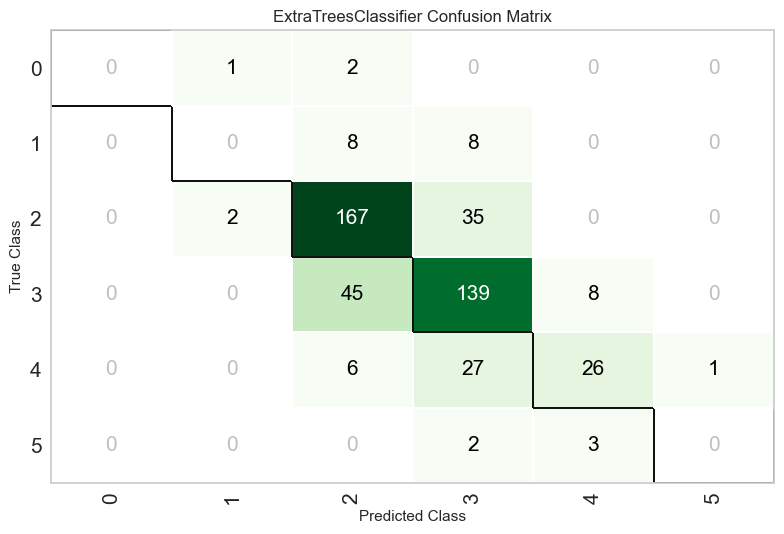

In [23]:
#plot confusion matrix
plot_model(best, plot= 'confusion_matrix')

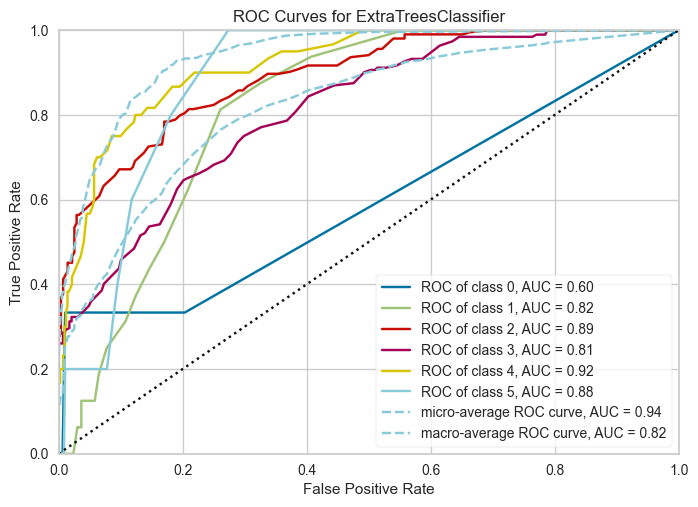

In [24]:
#plot AUC
plot_model(best, plot='auc')

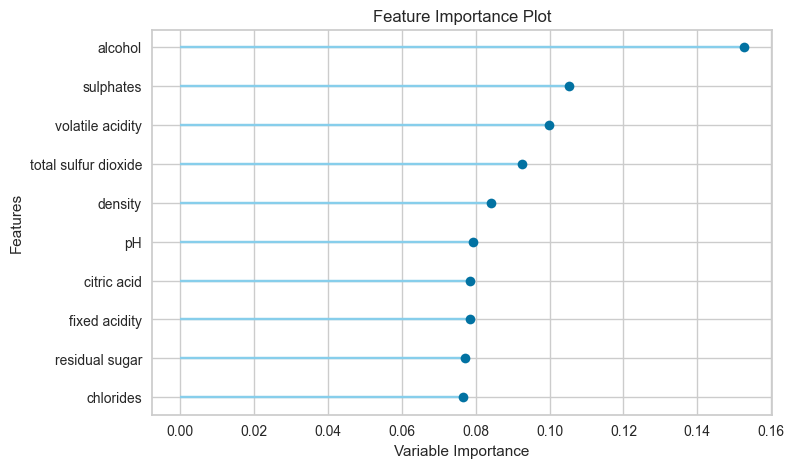

In [25]:
#plot feature importance
plot_model(best, plot='feature')

In [26]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Prediction

In [27]:
holdout_pred = predict_model(best)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6917,0.8583,0.6917,0.6626,0.6715,0.4965,0.5002


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
748,7.2,0.500,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6,6,6,0.72
1041,6.9,0.490,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6,5,0.58
680,13.3,0.430,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,5,6,0.65
217,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.1,5,5,0.70
1489,6.2,0.570,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6,6,0.53


Predict using the other wine dataset

In [28]:
#predict model on new data
new_df = pd.read_csv('winequality-white.csv', sep=';')
new_df = new_df.drop(columns=['quality'])
predictions = predict_model(best, data=new_df)
predictions.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,5,0.67
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,5,0.74
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,5,0.46
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,5,0.63
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,5,0.63
